**Trained with google colab**

# Import thư viện

In [ ]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import cv2
from math import *

import sklearn.model_selection
from sklearn.metrics import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !unzip "/content/CatDogGreyData.zip"

In [ ]:
# pip install split-folders

In [ ]:
# import splitfolders

# Đọc dữ liệu & tiền xử lý

In [ ]:
# splitfolders.ratio("/content/drive/MyDrive/Các công cụ lập trình AI/Animal Images", output="/content/drive/MyDrive/Các công cụ lập trình AI/AnimalImagesSplit/", seed=1337, ratio=(.75, .2, .05), move=True)

In [ ]:
ImageGen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,)
                                                          #  horizontal_flip = True,
                                                          #  rotation_range=20,
                                                          #  width_shift_range=0.1, 
                                                          #  height_shift_range=0.1)

In [ ]:
# img_train = ImageGen.flow_from_directory('/kaggle/input/catdoggraysplitted/AnimalImagesSplit/train', target_size=(224, 224), batch_size = 100,class_mode = 'binary')

In [ ]:
# img_val = ImageGen.flow_from_directory('/kaggle/input/catdoggraysplitted/AnimalImagesSplit/val', target_size=(224, 224), batch_size = 100,class_mode = 'binary')

In [ ]:
# img_test = ImageGen.flow_from_directory('/kaggle/input/catdoggraysplitted/AnimalImagesSplit/test', target_size=(224, 224), batch_size = 100,class_mode = 'binary', shuffle = False)

In [ ]:
img_train = ImageGen.flow_from_directory('/content/drive/MyDrive/Các công cụ lập trình AI/AnimalImagesSplit/train', target_size=(224, 224), batch_size = 100,class_mode = 'binary')

Found 22545 images belonging to 2 classes.


In [ ]:
img_val = ImageGen.flow_from_directory('/content/drive/MyDrive/Các công cụ lập trình AI/AnimalImagesSplit/val', target_size=(224, 224), batch_size = 100,class_mode = 'binary')

Found 6012 images belonging to 2 classes.


In [ ]:
img_test = ImageGen.flow_from_directory('/content/drive/MyDrive/Các công cụ lập trình AI/AnimalImagesSplit/test', target_size=(224, 224), batch_size = 100,class_mode = 'binary', shuffle = False)

Found 1504 images belonging to 2 classes.


In [ ]:
print("Class indices:", img_train.class_indices)

Class indices: {'cats': 0, 'dogs': 1}


# Xây dựng mô hình

In [ ]:
pretrained_model = tf.keras.applications.resnet50.ResNet50(input_shape = (224,224,3),include_top=False,weights="imagenet")

94765736/94765736 [==============================] - 4s 0us/step


In [ ]:
def build_model():
  inputs = tf.keras.layers.Input((224,224,3),name = 'input')

  model = tf.keras.applications.resnet50.ResNet50(include_top=False,weights="imagenet", input_tensor = inputs)
  x = model.output
  x = tf.keras.layers.GlobalAveragePooling2D(name = 'pooling')(x)
  outputs = tf.keras.layers.Dense(1,activation = 'sigmoid',name = 'outputs')(x)

  model = tf.keras.Model(inputs=inputs , outputs =outputs)

  return model

In [ ]:
model = build_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input[0][0]']                  
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

Train mô hình

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = tf.keras.losses.BinaryCrossentropy(), 
              metrics = ['binary_accuracy'])

In [ ]:
# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath='/content/drive/MyDrive/Các công cụ lập trình AI/checkpoint.h5',
#     save_weights_only=True,
#     monitor='val_accuracy',
#     mode='max')

In [ ]:
#With Earlystop only
# early_stop_callbacks = tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True)
history = model.fit(img_train, validation_data = img_val, epochs = 100)#, callbacks = model_checkpoint_callback)

Epoch 1/100
226/226 [==============================] - 231s 761ms/step - loss: 0.2437 - binary_accuracy: 0.9010 - val_loss: 5.7663 - val_binary_accuracy: 0.4990
Epoch 2/100
226/226 [==============================] - 143s 630ms/step - loss: 0.1307 - binary_accuracy: 0.9471 - val_loss: 0.6985 - val_binary_accuracy: 0.5188
Epoch 3/100
226/226 [==============================] - 141s 622ms/step - loss: 0.1017 - binary_accuracy: 0.9597 - val_loss: 0.9883 - val_binary_accuracy: 0.5000
Epoch 4/100
226/226 [==============================] - 141s 622ms/step - loss: 0.0849 - binary_accuracy: 0.9669 - val_loss: 0.3723 - val_binary_accuracy: 0.8476
Epoch 5/100
226/226 [==============================] - 142s 626ms/step - loss: 0.0668 - binary_accuracy: 0.9737 - val_loss: 0.2410 - val_binary_accuracy: 0.9012
Epoch 6/100
226/226 [==============================] - 141s 624ms/step - loss: 0.0594 - binary_accuracy: 0.9765 - val_loss: 0.6377 - val_binary_accuracy: 0.7370
Epoch 7/100
226/226 [=============

# Lưu mô hình

In [ ]:
model.save('CatDogGray.h5')

In [ ]:
model.save_weights("model_weight.h5")

# Đánh giá mô hình

In [ ]:
y_pred = model.predict(img_test)

16/16 [==============================] - 11s 656ms/step


In [ ]:
y_true = img_test.labels

In [ ]:
y_true.reshape(-1, 1)

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

In [ ]:
y_pred = np.where(y_pred > 0.5, 1,0)
y_pred

array([[0],
       [1],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [ ]:
model.evaluate(img_train)

226/226 [==============================] - 62s 271ms/step - loss: 1.7974e-06 - binary_accuracy: 1.0000


[1.7973649164559902e-06, 1.0]

In [ ]:
model.evaluate(img_val)

61/61 [==============================] - 17s 277ms/step - loss: 0.2557 - binary_accuracy: 0.9554


[0.25565922260284424, 0.9554224610328674]

In [ ]:
model.evaluate(img_test)

16/16 [==============================] - 4s 254ms/step - loss: 0.2564 - binary_accuracy: 0.9648


[0.25642359256744385, 0.9647606611251831]

In [ ]:
metrics_acc = tf.keras.metrics.Accuracy()
metrics_acc.update_state(y_true,y_pred)
metrics_acc.result().numpy()

0.96476066

In [ ]:
accuracy_score(y_true, y_pred)

0.9647606382978723

In [ ]:
confusion_matrix(y_true,y_pred)

array([[722,  31],
       [ 22, 729]])

In [ ]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       753
           1       0.96      0.97      0.96       751

    accuracy                           0.96      1504
   macro avg       0.96      0.96      0.96      1504
weighted avg       0.96      0.96      0.96      1504



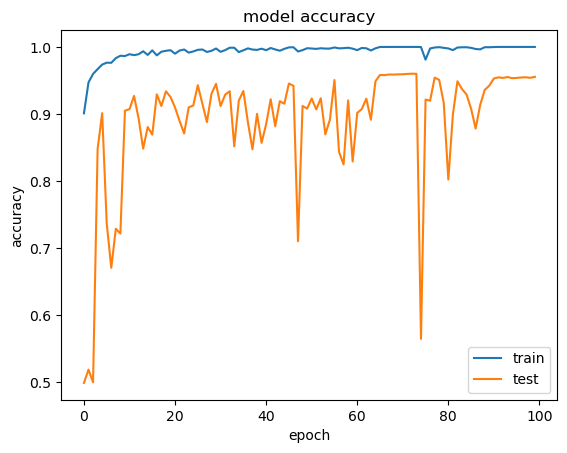

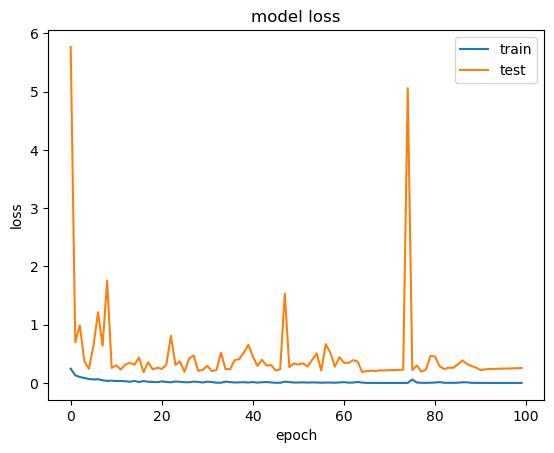

In [ ]:
# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Demo

Load mô hình

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Các công cụ lập trình AI/CatDogGray.h5')

In [ ]:
model.summary()

Dữ liệu từ tập test

In [ ]:
img, label = img_test.next()

In [ ]:
labels = ['cats', 'dogs']

In [ ]:
y_pred = model.predict(img[0].reshape(1,224,224,3))
y_pred = np.where(y_pred > 0.5, 1,0)
labels[y_pred[0][0]]

1/1 [==============================] - 9s 9s/step


'cats'

In [ ]:
y_pred = model.predict(img[0].reshape(1,224,224,3))
y_pred

1/1 [==============================] - 0s 25ms/step


array([[1.3652735e-13]], dtype=float32)

'cats'

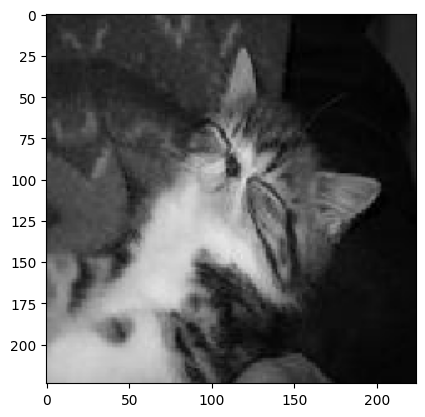

In [ ]:
plt.imshow(img[0])
labels[int(label[0])]

Dữ liệu ngoài tập test 

In [ ]:
dog_img = cv2.imread("/content/2013-03-28_421270381365376112.jpg")
dog_img = cv2.resize(dog_img, [224, 224])
dog_img = dog_img / 255
# dog_img = cv2.merge(dog_img, dog_img, dog_img)

1/1 [==============================] - 0s 43ms/step
[[0.9998734]]
dogs


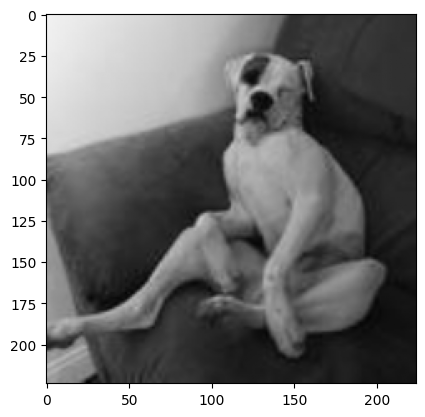

In [ ]:
y_pred = model.predict(np.array([dog_img]))
print(y_pred)
y_pred = np.where(y_pred > 0.5, 1,0)
print(labels[y_pred[0][0]])
plt.imshow(dog_img)